<a href="https://colab.research.google.com/github/RakhaFS/TA-AMS/blob/main/Visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#VISUALISASI

##Load Data

In [1]:
import pandas as pd
bahan = "https://raw.githubusercontent.com/RakhaFS/TA-AMS/refs/heads/main/hasil_finetune_Shell.csv"
df = pd.read_csv(bahan)
df.head()

,favorite_count,full_text,clean_text,sentiment
0,0,Oli Mesin Bensin &amp; Diesel Galon 4L SHELL H...,oli mesin bensin amp diesel galon l shell heli...,neutral
1,3,WTS GSX-R 2017 150CC bagus KM 28RB EK-CHAIN Jo...,wts gsxr cc bagus km rb ekchain jok leather be...,neutral
2,0,Ternyata beli bensin pake member Shell enak ba...,beli bensin pake member shell enak banget harg...,positive
3,0,@detikcom Kalau gua beli bensin di @Shell buka...,gua beli bensin merugikan negara namanya dagan...,neutral
4,0,ranking things i d replace my pee with : 1. es...,ranking things i d replace my pee with es cend...,neutral


##WordCloud

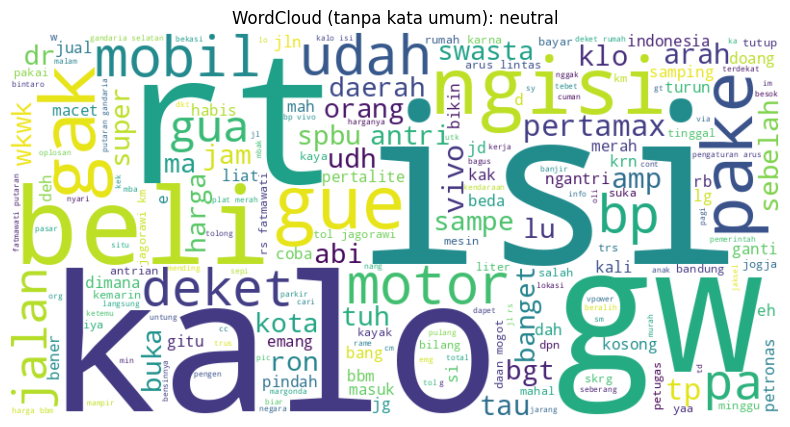

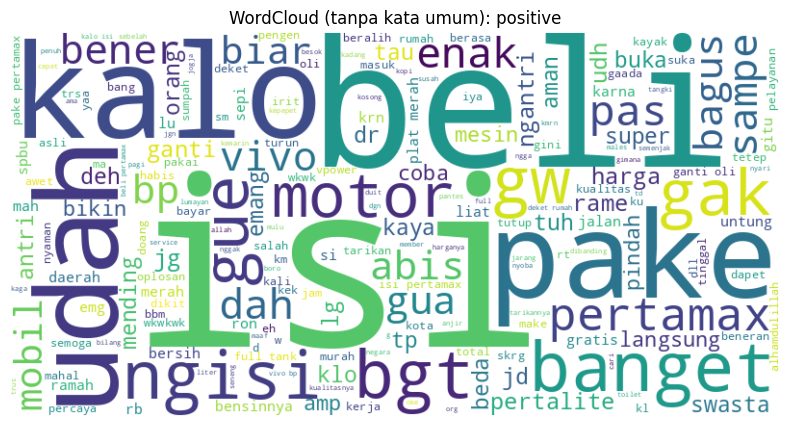

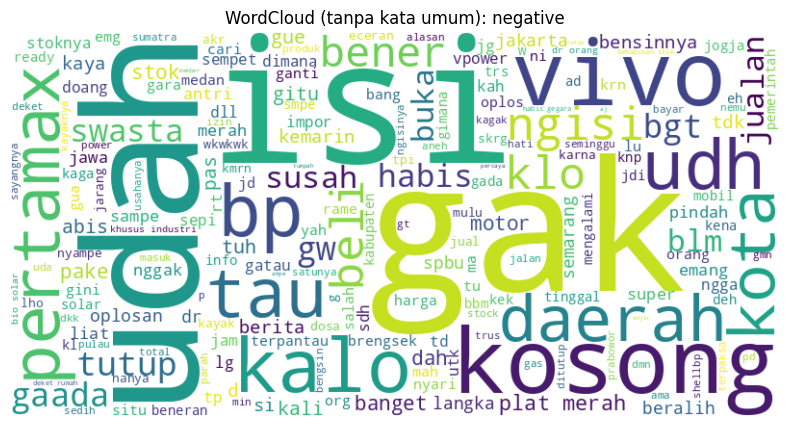

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# pastikan clean_text & sentiment aman dari NaN
df['clean_text'] = df['clean_text'].fillna("").astype(str)
df['sentiment'] = df['sentiment'].fillna("").astype(str)

# daftar kata yang mau dihapus biar nggak mendominasi
exclude_words = {"shell","bensin","pom","ga","ya","pertamina"}

def filter_exclude(text):
    return " ".join([w for w in text.split() if w not in exclude_words])

# loop per sentimen
for label in df['sentiment'].unique():
    # filter kata yang mau dihapus
    filtered_text = df[df['sentiment'] == label]['clean_text'].apply(filter_exclude)

    # gabungkan semua teks untuk label ini
    text = ' '.join(filtered_text)

    # generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # tampilkan
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud (tanpa kata umum): {label}")
    plt.show()


##N-Gram

In [3]:
from collections import Counter
from nltk.util import ngrams
import pandas as pd

def get_top_ngrams(texts, n=1, top_k=20):
    """
    texts : list/series of string
    n     : n-gram size (1=unigram, 2=bigram, 3=trigram)
    top_k : ambil ngram terbanyak

    return: DataFrame top ngram & count
    """
    # gabungkan semua teks
    all_text = " ".join(texts).split()

    # buat ngram
    ngram_list = ngrams(all_text, n)

    # hitung frekuensi
    ngram_counts = Counter(ngram_list)

    # ambil top_k
    top_ngrams = ngram_counts.most_common(top_k)

    # ubah ke DataFrame
    df_ngram = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])
    # ubah tuple jadi string misal ('bensin','mahal') -> "bensin mahal"
    df_ngram['ngram'] = df_ngram['ngram'].apply(lambda x: " ".join(x))

    return df_ngram

In [22]:
neg_texts = df[df['sentiment'] == "negative"]['clean_text']
neg_bigram_df = get_top_ngrams(neg_texts, n=4, top_k=20)
print("NEGATIVE NGRAM")
print(neg_bigram_df)

NEGATIVE NGRAM
                                   ngram  count
0                pom bensin shell kosong      9
1                  pom bensin shell udah      5
2                  pom bensin plat merah      4
3                   pom bensin shell gak      4
4                   pom bensin shell jam      3
5               kemarin pom bensin shell      3
6                  pom bensin shell sepi      3
7                    ga pom bensin shell      3
8                   pom bensin shell isi      2
9                isi bensin shell kosong      2
10                bensin shell jam sgini      2
11                   shell jam sgini udh      2
12                   jam sgini udh tutup      2
13  shell mengalami kelangkaan terpantau      2
14    mengalami kelangkaan terpantau pom      2
15       kelangkaan terpantau pom bensin      2
16            terpantau pom bensin shell      2
17          bensin shell kosong stocknya      2
18          berkeliling pom bensin shell      2
19         pom bensin she

In [23]:
pos_texts = df[df['sentiment'] == "positive"]['clean_text']
pos_bigram_df = get_top_ngrams(pos_texts, n=5, top_k=20)
print("POSITIVE NGRAM")
print(pos_bigram_df)

POSITIVE NGRAM
                                     ngram  count
0            pelanggan shell santai ya gak     10
1              shell santai ya gak antrian     10
2                santai ya gak antrian pom     10
3                ya gak antrian pom hehehe     10
4           rutin lintas panter pom bensin      7
5           lintas panter pom bensin shell      7
6              panter pom bensin shell kel      7
7                pom bensin shell kel duri      7
8            bensin shell kel duri kosambi      7
9               shell kel duri kosambi yuk      7
10               kel duri kosambi yuk jaga      7
11        duri kosambi yuk jaga kebersihan      7
12  kosambi yuk jaga kebersihan lingkungan      7
13            pom bensin swasta shell vivo      4
14        hehehe pelanggan shell santai ya      4
15             info pom bensin shell jalan      4
16         pom bensin shell jalan soekarno      4
17       bensin shell jalan soekarno hatta      4
18           shell jalan soekarno h

In [24]:
net_texts = df[df['sentiment'] == "neutral"]['clean_text']
net_bigram_df = get_top_ngrams(net_texts, n=5, top_k=20)
print("NEUTRAL NGRAM")
print(net_bigram_df)

NEUTRAL NGRAM
                                        ngram  count
0               pom bensin shell tol jagorawi     46
1                bensin shell tol jagorawi km     45
2                 jl rs fatmawati putaran pom     41
3             rs fatmawati putaran pom bensin     41
4          fatmawati putaran pom bensin shell     41
5                     at pom bensin shell tol     40
6           putaran pom bensin shell gandaria     37
7           pom bensin shell gandaria selatan     36
8              pengaturan arus lintas pagi jl     25
9                      arus lintas pagi jl rs     25
10                lintas pagi jl rs fatmawati     25
11               pagi jl rs fatmawati putaran     25
12                     im at pom bensin shell     23
13                pom bensin shell pom bensin     18
14      spbu pertamina dinilai sulit bersaing     17
15     pertamina dinilai sulit bersaing shell     17
16  dinilai sulit bersaing shell dibandingkan     17
17      sulit bersaing shell dib

###Bar Chart by N-Gram

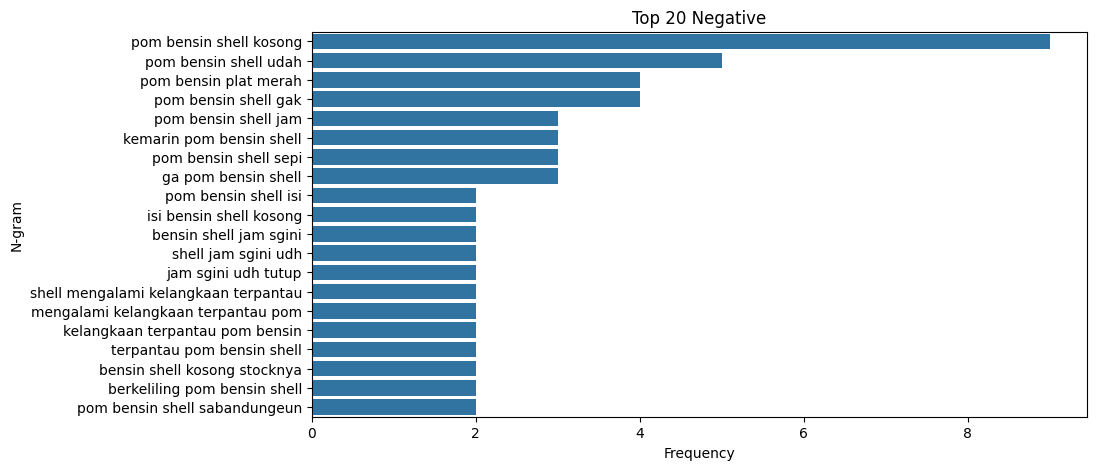

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_ngram(df_ngram, title="Top N-grams"):
    plt.figure(figsize=(10,5))
    sns.barplot(x='count', y='ngram', data=df_ngram)
    plt.title(title)
    plt.xlabel("Frequency")
    plt.ylabel("N-gram")
    plt.show()

# contoh plot bigram
plot_ngram(neg_bigram_df, title="Top 20 Negative")


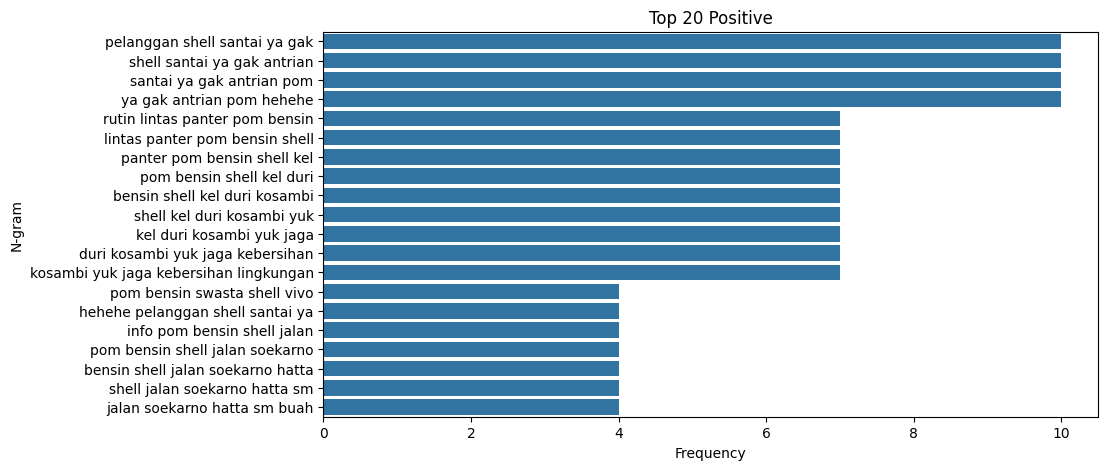

In [8]:
plot_ngram(pos_bigram_df, title="Top 20 Positive")

##Topic Modelling

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# ambil hanya kolom clean_text
texts = df['clean_text'].fillna("").astype(str).tolist()

# buat bag-of-words
vectorizer = CountVectorizer(max_df=0.95, min_df=2)  # buang kata yg terlalu sering/langka
X = vectorizer.fit_transform(texts)

print("Shape BoW:", X.shape)  # misal (5000 dokumen, 7000 kata)


Shape BoW: (6228, 5461)


In [17]:
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 10  # Banyak topik
lda_model = LatentDirichletAllocation(
    n_components=num_topics,
    random_state=42,
    learning_method='batch'
)
lda_model.fit(X)


LatentDirichletAllocation(random_state=42)

In [21]:
for senti in df['sentiment'].unique():
    print(f"\n==== TOPIC MODELLING UNTUK SENTIMEN: {senti.upper()} ====")

    # filter teks sesuai sentimen
    texts = df[df['sentiment'] == senti]['clean_text'].tolist()

    # vectorizer baru
    vectorizer = CountVectorizer(max_df=0.95, min_df=2)
    X = vectorizer.fit_transform(texts)

    # LDA baru
    lda_model = LatentDirichletAllocation(n_components=3, random_state=42)
    lda_model.fit(X)

    # print kata kunci per topik
    print_topics(lda_model, vectorizer, top_n=8)



==== TOPIC MODELLING UNTUK SENTIMEN: NEUTRAL ====

🔹 Topik 1:
pom, bensin, arah, jalan, jam, sebelah, jl, rt

🔹 Topik 2:
bensin, pom, isi, kalo, gw, ya, ga, beli

🔹 Topik 3:
pom, bensin, pertamina, harga, bp, ya, beli, rt

==== TOPIC MODELLING UNTUK SENTIMEN: POSITIVE ====

🔹 Topik 1:
shell, bensin, pom, pertamina, isi, ga, beli, ya

🔹 Topik 2:
shell, bensin, pom, banget, ngisi, bgt, kalo, ya

🔹 Topik 3:
shell, bensin, isi, pom, pake, ga, kalo, pertamax

==== TOPIC MODELLING UNTUK SENTIMEN: NEGATIVE ====

🔹 Topik 1:
pom, bensin, ga, pertamina, ya, pertamax, vivo, daerah

🔹 Topik 2:
pom, bensin, ga, gak, ya, kosong, udah, bp

🔹 Topik 3:
bensin, pom, isi, udah, udh, kosong, gak, ga
